En el apartado "Loading Data" de esta URL:

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Se explica cómo se cargan una serie de datos: 

1. Utiliza esa misma forma para cargar los datos.
2. Limpia los datos si es necesario
3. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
4. Intenta superarte en el score cambiando las features de los algoritmos.

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def get_KTrend(df):
    # Función para visualizar el comportamiento de las distintas Ks en un rango de 1 a 20 para un conjunto determinado.
    X = np.array(df.loc[:, :29])
    y = np.array(df[30])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    n_max_score = (0, 0)

    k_range = range(1, 20)
    scores = {}
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train, y_train)
        scores[k] = (knn.score(X_train, y_train) + knn.score(X_test, y_test)) / 2
        if n_max_score[1] < scores[k]:
            n_max_score = (k, scores[k])

    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, list(scores.values()))
    plt.xticks([0,5,10,15,20])

    return n_max_score

(1, 0.9649122807017544)

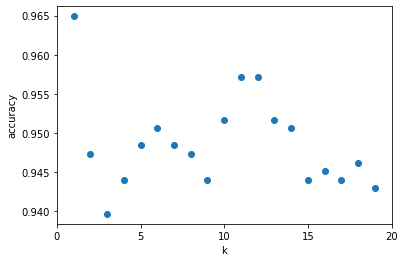

In [60]:
get_KTrend(df)

In [57]:
def get_KScore(df, neighbor, size=0.20, random_state=42):
    # Función que retorna una el score para un número de vecinos especificado.
    data = {'Model':'KNN'}

    X = np.array(df.loc[:, :29])
    y = np.array(df[30])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random_state)

    k = KNeighborsClassifier(n_neighbors=neighbor)
    k.fit(X_train, y_train)

    test_score = k.score(X_test, y_test)
    train_score = k.score(X_train, y_train)

    data['Train_Score'] = train_score
    data['Test_Score'] = test_score

    return pd.DataFrame(data, index=[0])

In [58]:
get_KScore(df, 1)

,Model,Train_Score,Test_Score
0,KNN,1.0,0.929825


In [63]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

def get_LogScore(df, size=0.20, max_iter=100, random_state=42, test=False):
    data = {'Model':'Log_Reg'}

    X = np.array(df.loc[:, :29])
    y = np.array(df[30])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=random_state)

    logReg = LogisticRegression(max_iter=max_iter)
    logReg.fit(X_train, y_train)

    test_score = logReg.score(X_test, y_test)
    train_score = logReg.score(X_train, y_train)

    data['Train_Score'] = train_score
    data['Test_Score'] = test_score

    return pd.DataFrame(data, index=[0])

In [64]:
get_LogScore(df, max_iter=5000)

,Model,Train_Score,Test_Score
0,Log_Reg,0.962637,0.95614


In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

def get_SVCScore(df, C=100, gamma=0.1, random_state=42, standard=True):

    kernel = ['rbf', 'linear', 'poly']
    data = {'Model':[], 'Train_Score':[], 'Test_Score':[]}

    for k in kernel:
        svc = SVC(kernel=k, C=C, gamma=gamma)

        X = np.array(df.loc[:, :29])
        y = np.array(df[30])

        if standard:
            scaler = StandardScaler()
            scaler.fit(X)
            X = scaler.transform(X)

        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=random_state)

        model = svc.fit(X_train, y_train)
        data['Model'].append(f'SVC-{k}')
        data['Train_Score'].append(model.score(X_train, y_train))
        data['Test_Score'].append(model.score(X_test, y_test))
 
    return pd.DataFrame(data, index=[0,1,2])

In [66]:
get_SVCScore(df)

,Model,Train_Score,Test_Score
0,SVC-rbf,1.000000,0.964912
1,SVC-linear,0.997802,0.929825
2,SVC-poly,1.000000,0.938596


In [67]:
results = pd.concat([get_KScore(df, 1), get_LogScore(df, max_iter=5000), get_SVCScore(df)], ignore_index=True)

In [68]:
results

,Model,Train_Score,Test_Score
0,KNN,1.000000,0.929825
1,Log_Reg,0.962637,0.956140
2,SVC-rbf,1.000000,0.964912
3,SVC-linear,0.997802,0.929825
4,SVC-poly,1.000000,0.938596


In [69]:
results.sort_values(['Train_Score', 'Test_Score'], ascending=False)

,Model,Train_Score,Test_Score
2,SVC-rbf,1.000000,0.964912
4,SVC-poly,1.000000,0.938596
0,KNN,1.000000,0.929825
3,SVC-linear,0.997802,0.929825
1,Log_Reg,0.962637,0.956140


In [ ]:
# Observando los resultados se concluye que el modelo SVC con kernel 'rbf' es el más adecuado para este conjunto.